# ChatGPT、GPTを使ったtitanic分析応用編

ここでは、LangChainというGPTのAPIを使うライブラリを活用して、titnaicの分析をChatGPT風にやってみます。
 
 LangChainに準備される、pandas のagentを試します。

 https://python.langchain.com/en/latest/modules/agents/toolkits/examples/pandas.html

In [ ]:
!pip install langchain
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 938.0/938.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from langchain.agents import create_pandas_dataframe_agent

In [ ]:
from langchain.llms import OpenAI
import pandas as pd

df = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


OpenAIのキーを入れる

In [ ]:
# get a token: https://platform.openai.com/account/api-keys

from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [ ]:
import os

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [ ]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 891
Thought: I now know the final answer
Final Answer: There are 891 rows.

> Finished chain.


'There are 891 rows.'

In [ ]:
agent.run("give me explanation for each column")



> Entering new AgentExecutor chain...
Thought: I should look at each column and explain what it means
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Thought: I should explain each column
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare      

"PassengerId: Unique identifier for each passenger\nSurvived: Whether the passenger survived or not (1 = survived, 0 = did not survive)\nPclass: The passenger's class (1 = first class, 2 = second class, 3 = third class)\nName: The passenger's name\nSex: The passenger's gender\nAge: The passenger's age\nSibSp: The number of siblings/spouses the passenger had on board\nParch: The number of parents/children the passenger had on board\nTicket: The passenger's ticket number\nFare: The fare the passenger paid\nCabin: The cabin the passenger was in\nEmbarked: The port the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton)"

In [ ]:
agent.run("whats the square root of the average age?")



> Entering new AgentExecutor chain...
Thought: I need to calculate the average age first
Action: python_repl_ast
Action Input: df['Age'].mean()
Observation: 29.69911764705882
Thought: I now need to calculate the square root of the average age
Action: python_repl_ast
Action Input: math.sqrt(df['Age'].mean())
Observation: NameError: name 'math' is not defined
Thought:

 I need to import the math library
Action: python_repl_ast
Action Input: import math
Observation: 
Thought: I now need to calculate the square root of the average age
Action: python_repl_ast
Action Input: math.sqrt(df['Age'].mean())
Observation: 5.449689683556195
Thought: I now know the final answer
Final Answer: 5.449689683556195

> Finished chain.


'5.449689683556195'



> Entering new AgentExecutor chain...
Thought: I need to group the ages into the three categories and then draw a pie chart
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: NameError: name 'pd' is not defined
Thought: I need to import pandas
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought: Now I can group the ages
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: NameError: name 'np' is not defined
Thought: I need to import numpy
Action: python_repl_ast
Action Input: import numpy as np
Observation: 
Thought: Now I can group the ages
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: 
Thought: Now I can draw the pie chart
Action: python_repl_ast
Action Input: df['AgeGroup']

"Use the code df['AgeGroup'].value_counts().plot.pie(autopct='%1.1f%%', legend=True) to draw a pie chart with legend for the three age groups."

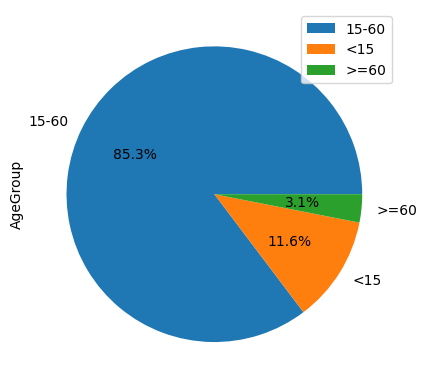

In [ ]:
agent.run("make three age groupes:  age <15, 15=<age<60<, age>=60. draw pie chart with legend for these age groupe")

In [ ]:
agent.run('what is the most survived group? what is the opposite?')



> Entering new AgentExecutor chain...


Thought: I need to find the group with the highest survival rate and the group with the lowest survival rate
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].mean()
Observation: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Thought: I now know the final answer
Final Answer: The most survived group is female with a survival rate of 74.2%, and the least survived group is male with a survival rate of 18.9%.

> Finished chain.


'The most survived group is female with a survival rate of 74.2%, and the least survived group is male with a survival rate of 18.9%.'

In [ ]:
agent.run('what is the most survived group? what is the opposite? the group must be grouped using at least three attributes')

In [ ]:
agent.run("make cross summery table for PClass and suvived. show the table")

In [ ]:
agent.run("make cross summery table for PClass and suvived. draw bar chart with legend")

In [ ]:
agent.run("make cross summery table for PClass and suvived. draw piled bar chart with legend")

In [ ]:
agent.run("make summary table which tells for each PClass the dead(Survived=0), survived(Survived =1), and the suvival ratio. Show me the table")

In [ ]:
agent.run("make cross summery table for PClass and hierachy of sex and suvived. draw  bar chart with legend")

In [ ]:
agent.run("make cross summery table for PClass, sex,m and suvived. draw  3 dimensions  chart with legend")

In [ ]:
agent.run("do you have any logical explanation for that female passengers have more suvival rate than male?")

In [ ]:
#response = pandas_ai.run(df, "make regression model on survival rate for male")
agent.run("make regression model on survival rate for male")



> Entering new AgentExecutor chain...
Thought: I need to get the survival rate for male
Action: python_repl_ast
Action Input: df[df['Sex'] == 'male']['Survived'].mean()
Observation: 0.18890814558058924
Thought: I now know the final answer
Final Answer: The survival rate for male is 0.18890814558058924.

> Finished chain.


'The survival rate for male is 0.18890814558058924.'

In [ ]:
#response = pandas_ai.run(df, "make regression model on survival rate for male")
agent.run('''make regression model for survival rate based on
 sex, age, and fare. show me the coefficiencies for each explanatory variable''')



> Entering new AgentExecutor chain...
Thought: I need to create a regression model
Action: python_repl_ast
Action Input: from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['Sex', 'Age', 'Fare']]
y = df['Survived']

model.fit(X, y)
Observation: ValueError: could not convert string to float: 'male'
Thought:

<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 I need to convert the string values to numerical values
Action: python_repl_ast
Action Input: from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Sex'] = le.fit_transform(X['Sex'])

model.fit(X, y)
Observation: ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Thought: I need to use an imputer transformer
Action: python_repl_ast
Action Input: from sklearn.impute import Simple

'The coefficients for sex, age, and fare are -0.51824834, -0.00158618, and 0.0016486 respectively.'

# Pandas-AIを使う場合

In [ ]:
!pip install pandasai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.13.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is 

In [ ]:
import pandas as pd
from pandasai import PandasAI

In [ ]:
# OpenAIのキー設定とか

In [ ]:
import pandas as pd

df = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv')

In [ ]:
# Instantiate a LLM
from pandasai.llm.openai import OpenAI
llm = OpenAI()

pandas_ai = PandasAI(llm, conversational=False)

In [ ]:
response = pandas_ai.run(df, "Top ten highest fare")
print(response)

     PassengerId  Survived  Pclass                                   Name  \
258          259         1       1                       Ward, Miss. Anna   
737          738         1       1                 Lesurer, Mr. Gustave J   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1             Fortune, Miss. Mabel Helen   
27            28         0       1         Fortune, Mr. Charles Alexander   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
311          312         1       1             Ryerson, Miss. Emily Borie   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
118          119         0       1               Baxter, Mr. Quigg Edmond   

        Sex   Age  SibSp  Parch    Ticket      Fare            Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292              NaN    

In [ ]:
response = pandas_ai.run(df, "What is the correlation between survival and age?")
print(response)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Co

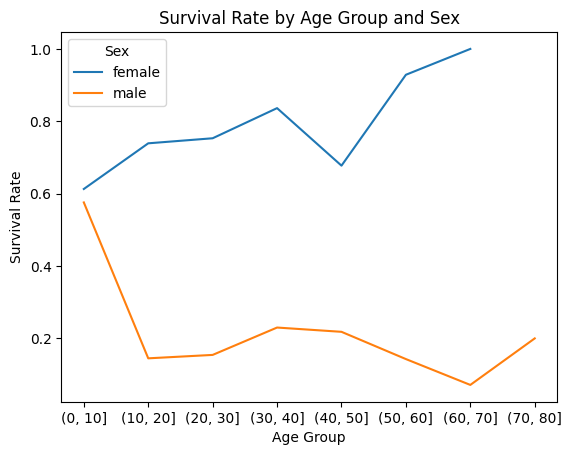

In [ ]:
response = pandas_ai.run(df, "draw a line graph of survival rate upon age goupe of 10 for male and female.")

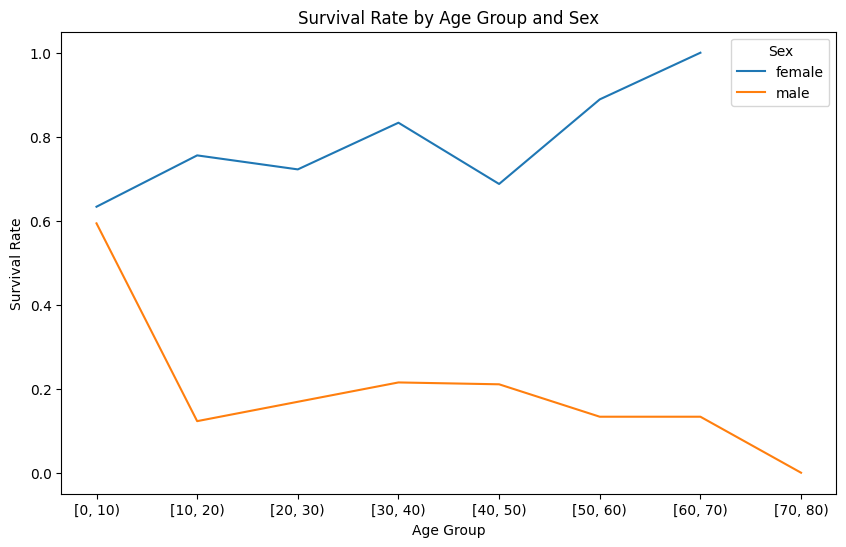

In [ ]:
response = pandas_ai.run(df, "draw a line graph of survival rate with variance upon age goupe of 10 for male and female. ")

In [ ]:
response = pandas_ai.run(df, "make regression model on survival rate for male")
print(response)

In [ ]:
response

''